<a href="https://colab.research.google.com/github/shamim-reja23/Ecg-Covid19-using-EfficientNetB0/blob/main/ECG_Covid19_classification_EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import needed libirares
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
from tensorflow.keras.utils import load_img,img_to_array

In [ ]:
#read training data
np.random.seed(1234)
path='drive/MyDrive/archive/train'
img_list=os.listdir(path)
lables=[i for i in range(len(img_list))]
label_dict=dict()
label_dict['ECG Images of Myocardial Infarction Patients (240x12=2880)']= 0
label_dict['ECG Images of Patient that have History of MI (172x12=2064)']= 1
label_dict['ECG Images of Patient that have abnormal heartbeat (233x12=2796)']= 2
label_dict['Normal Person ECG Images (284x12=3408)']= 3
label_dict['ECG Images of COVID-19 Patients (250)']=4
data=[]
label=[]
C=0
for cat in img_list:
    C=0
    pic_list=os.path.join(path,cat)
    for img in  os.listdir(pic_list):
        image=os.path.join(pic_list,img)
        #print(image)
        image=cv2.imread(image)
        #image=procssing(image)
        #image=cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        #image=img_to_array(image)
        data.append(image)
        label.append(label_dict[cat])
        C+=1
    print(C)

233
239
172
284
250


In [ ]:
data=np.array(data)
data.shape


(1178, 224, 224, 3)

In [ ]:
label=np.array(label)
label.shape


(1178,)

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten,Conv2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3

In [ ]:
num_classes = 5
label = keras.utils.to_categorical(label, num_classes)

In [ ]:
model=EfficientNetB0(include_top=True,weights=None,input_shape=(224,224,3),classes=5)
model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ normalization[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand         │ (None, 1, 1, 32)       │            288 │ block1a_se_reduce[0][… │
│ (Conv2D)             

 Total params: 4,055,976 (15.47 MB)

 Trainable params: 4,013,953 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001),metrics=['accuracy'])

In [ ]:
history=model.fit(data,label,batch_size=16,epochs=15, validation_split=0.1)

Epoch 1/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.3650 - loss: 2.6684 - val_accuracy: 0.0000e+00 - val_loss: 1.5232
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.5158 - loss: 1.4010 - val_accuracy: 0.0000e+00 - val_loss: 1.2624
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 317s 4s/step - accuracy: 0.6510 - loss: 1.0218 - val_accuracy: 1.0000 - val_loss: 0.4378
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.7836 - loss: 0.6491 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.7810 - loss: 0.6294 - val_accuracy: 1.0000 - val_loss: 1.2979e-04
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 323s 4s/step - accuracy: 0.8331 - loss: 0.4584 - val_accuracy: 1.0000 - val_loss: 1.0092e-06
Epoch 7/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.8246 - loss: 0.4874 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 8/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 324s 4s/step - accuracy: 0.8054 - loss: 0.6135 - val_accu

In [ ]:
# np.random.seed(1234)
# path_test='drive/MyDrive/archive/test'
# img_list_test=os.listdir(path_test)
# lables=[i for i in range(len(img_list_test))]
# label_dict=dict()
# label_dict['ECG Images of Myocardial Infarction Patients (240x12=2880)']= 0
# label_dict['ECG Images of Patient that have History of MI (172x12=2064)']= 1
# label_dict['ECG Images of Patient that have abnormal heartbeat (233x12=2796)']= 2
# label_dict['Normal Person ECG Images (284x12=3408)']= 3
# label_dict['ECG Images of COVID-19 Patients (250)']=4
# data_test=[]
# label_test=[]
# C=0
# for cat in img_list_test:
#     C=0
#     pic_list=os.path.join(path_test,cat)
#     for img in  os.listdir(pic_list):
#         image=os.path.join(pic_list,img)
#         #print(image)
#         image=cv2.imread(image)
#         #image=procssing(image)
#         #image=cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
#         image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, (224, 224))
#         #image=img_to_array(image)
#         data_test.append(image)
#         label_test.append(label_dict[cat])
#         C+=1
#     print(C)

import os
import cv2
import numpy as np
from PIL import Image

np.random.seed(1234)
path_test = 'drive/MyDrive/archive/test'
img_list_test = os.listdir(path_test)

label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3,
    'ECG Images of COVID-19 Patients (250)': 4
}

data_test = []
label_test = []

for cat in img_list_test:
    pic_list = os.path.join(path_test, cat)
    if not os.path.isdir(pic_list):  # Skip non-directory files
        continue

    count = 0
    for img in os.listdir(pic_list):
        if img.startswith('.'):  # Skip hidden files
            continue

        image_path = os.path.join(pic_list, img)

        # Check if the image exists
        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            continue

        # Try OpenCV first
        image = cv2.imread(image_path)

        # If OpenCV fails, use PIL
        if image is None:
            print(f"OpenCV failed to load {image_path}. Trying PIL...")
            try:
                image = Image.open(image_path)
                image = image.resize((224, 224))
                image = np.array(image)
            except Exception as e:
                print(f"Error loading {image_path} with PIL: {e}")
                continue  # Skip this image

        else:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))

        data_test.append(image)
        label_test.append(label_dict.get(cat, -1))  # Default to -1 if label is missing
        count += 1

    print(f"Processed {count} images in category '{cat}'")

print(f"Total images loaded: {len(data_test)}")


Processed 112 images in category 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
Processed 112 images in category 'ECG Images of Patient that have History of MI (172x12=2064)'
Processed 112 images in category 'ECG Images of Myocardial Infarction Patients (240x12=2880)'
Processed 112 images in category 'Normal Person ECG Images (284x12=3408)'
Processed 112 images in category 'ECG Images of COVID-19 Patients (250)'
Total images loaded: 560


In [ ]:
data_test=np.array(data_test)
data_test.shape

(560, 224, 224, 3)

In [ ]:
label_test=np.array(label_test)
label_test.shape

(560,)

In [ ]:
num_classes = 5
label_test = keras.utils.to_categorical(label_test, num_classes)
label_test.shape


(560, 5)

In [ ]:
_, acc = model.evaluate(data_test, label_test)


18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9846 - loss: 0.0884


In [ ]:
y_pred=model.predict(data_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(f"Shape of y_pred: {np.array(y_pred).shape}")


Shape of y_pred: (560,)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Convert one-hot encoded `label_test` to class labels
label_test = np.argmax(label_test, axis=1)

# Now, both `label_test` and `y_pred` are in the same format
print(classification_report(label_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       0.97      1.00      0.99       112
           2       0.97      0.96      0.97       112
           3       0.97      1.00      0.98       112
           4       1.00      0.95      0.97       112

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



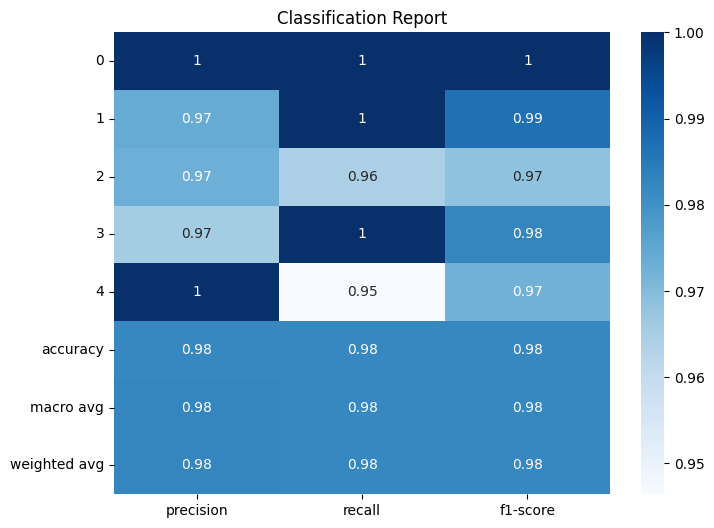

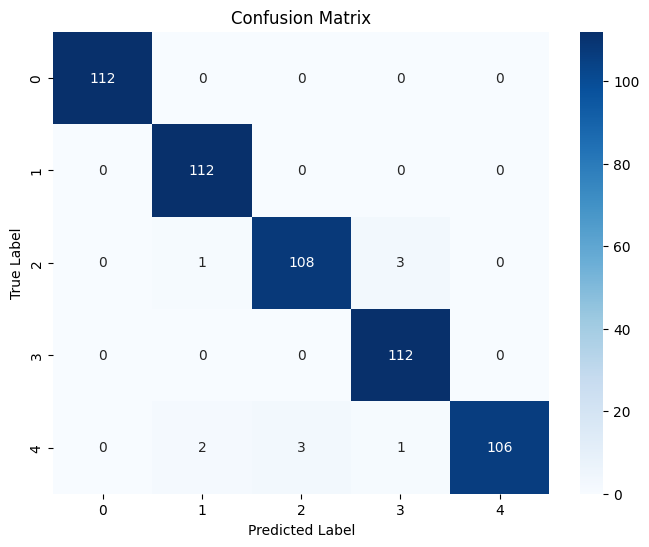

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded labels to class indices if needed
if len(label_test.shape) > 1:
    label_test = np.argmax(label_test, axis=1)

# Generate classification report
report = classification_report(label_test, y_pred, output_dict=True)

# Convert classification report to a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title("Classification Report")
plt.show()

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(label_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(label_test), yticklabels=np.unique(label_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


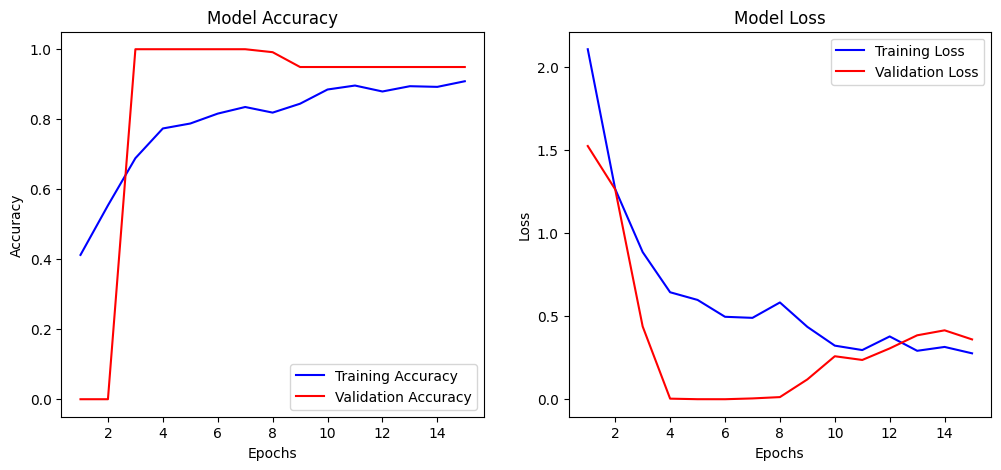

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by `model.fit()`
def plot_training_history(history):
    # Extract training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()

# Call the function after training
plot_training_history(history)


In [ ]:
# Extract final accuracy values
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")


Final Training Accuracy: 0.9085
Final Validation Accuracy: 0.9492


In [ ]:
# Save the trained model
model.save('ecg_model.h5')
print("Model saved as ecg_model.h5")

Model saved as ecg_model.h5


In [ ]:
from google.colab import files
files.download('ecg_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>